In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_55571_G')

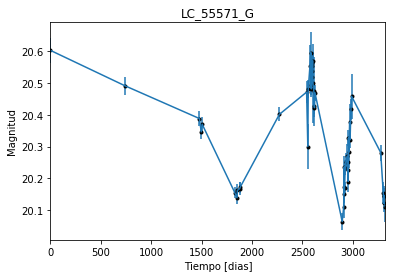

In [2]:
data = np.genfromtxt('LC_55571_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_55571_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

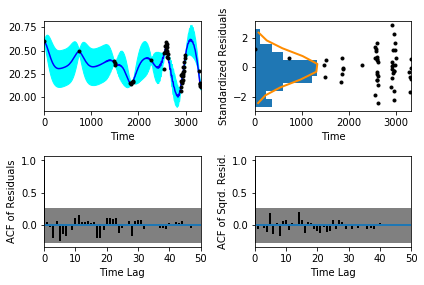

In [5]:
sample.assess_fit()

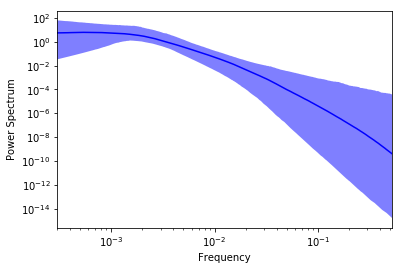

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_55571_G')

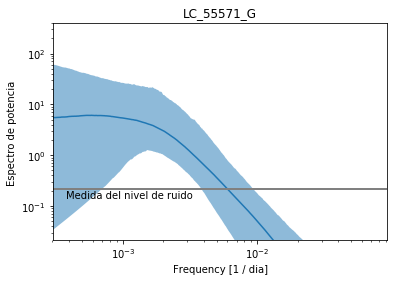

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_55571_G')

Text(0.5,1,'Prediccion , valor esperado LC_55571_G')

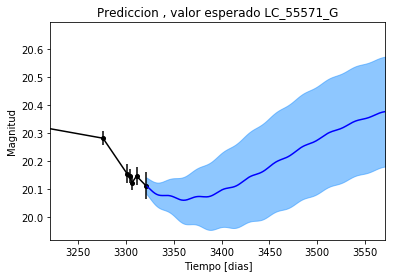

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_55571_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_55571_G')

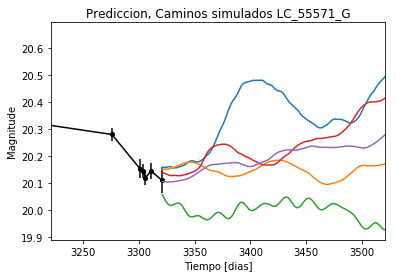

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_55571_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_55571_G')

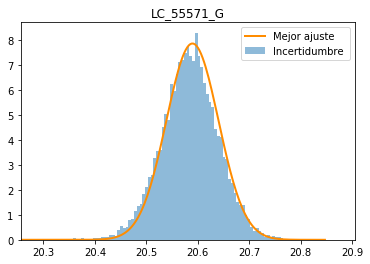

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_55571_G')

Text(0.5,1,'Interpolacion, camino simulado LC_55571_Z')

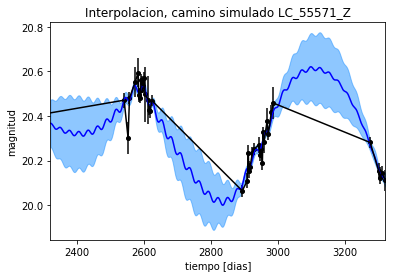

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_55571_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_55571_G')

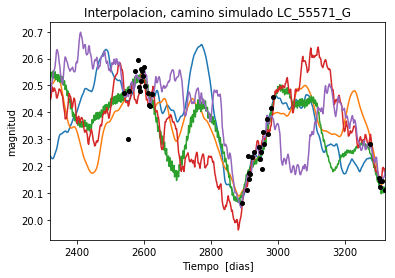

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_55571_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 476.328892209
Median: 0.0106077612975
Standard deviation: 0.197894260416
68% credibility interval: [ 0.0008633   0.17526459]
95% credibility interval: [  3.48843920e-04   7.65343111e-01]
99% credibility interval: [  3.06425089e-04   9.73925314e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 368.906910923
Median: 0.00284503774605
Standard deviation: 0.0986260093916
68% credibility interval: [ 0.00056461  0.03890171]
95% credibility interval: [  3.32127375e-04   3.40634141e-01]
99% credibility interval: [  3.06015250e-04   6.81194748e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 323.20445783
Median: 0.0150219686885


In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 476881.570967
Median: 88.1767102064
Standard deviation: 1.80187213822
68% credibility interval: [ 86.2385248   89.47934711]
95% credibility interval: [ 83.58853453  90.81927106]
99% credibility interval: [ 81.34301717  91.64931539]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 469.18427108
Median: 0.596994081561
Standard deviation: 2.08283230674
68% credibility interval: [ 0.07816376  3.73147174]
95% credibility interval: [ 0.01573814  7.18530062]
99% credibility interval: [ 0.01036487  9.67856368]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 384.386326395
Median: 0.414673290306
Standard deviation: 9.4755407259
68% credibility interval: [  0.02105441  10.49207806]
95% credibility interval: [  2.77888538e-0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1531.48491073
Median: 1.641297799e-23
Standard deviation: 2.70167636351e+142
68% credibility interval: [  3.46267266e-121   5.45791628e+078]
95% credibility interval: [  6.24869489e-170   2.36044632e+134]
99% credibility interval: [  2.94421149e-179   1.66956555e+141]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2644.22615851
Median: 20.3509353861
Standard deviation: 0.0773326806008
68% credibility interval: [ 20.29218903  20.41447004]
95% credibility interval: [ 20.20907186  20.51826269]
99% credibility interval: [ 20.09687974  20.61815305]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 209.071938409
Median: 0.0123633204335
Standard deviation: 0.265437759787
68% credibility interval: [ 0.          0.41610673]
95% credibility interval: [ 0.          0.91251701]
99% credibility interval: [ 0.          1.02493425]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 209.071938409
Median: 0.0123633204335
Standard deviation: 0.265437759787
68% credibility interval: [ 0.          0.41610673]
95% credibility interval: [ 0.          0.91251701]
99% credibility interval: [ 0.          1.02493425]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 409.036782622
Median: 0.0
Standard deviation: 0.000974955073179
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 476881.570967
Median: 88.1767102064
Standard deviation: 1.80187213822
68% credibility interval: [ 86.2385248   89.47934711]
95% credibility interval: [ 83.58853453  90.81927106]
99% credibility interval: [ 81.34301717  91.64931539]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3360.30660087
Median: 0.0349475872337
Standard deviation: 0.0386903899071
68% credibility interval: [ 0.02062746  0.06502979]
95% credibility interval: [ 0.01378322  0.13316925]
99% credibility interval: [ 0.01080724  0.23364548]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3061.04367665
Median: 1.16644287301
Standard deviation: 0.212098594295
68% credibility interval: [ 0.98208824  1.39263867]
95% credibility interval: [ 0.82460952  1.65849564]
99% credibility interval: [ 0.71915461  1.84687015]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 807.042527776
Median: 8.50596620144e-05
Standard deviation: 0.124474716717
68% credibility interval: [  7.09604266e-83   1.10632667e-02]
95% credibility interval: [  7.36072386e-137   1.74087790e-001]
99% credibility interval: [  6.06223220e-145   8.21422788e-001]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 476.328892209
Median: (-0.0666505299265+0j)
Standard deviation: 2.08028800547
68% credibility interval: [-1.10121992+0.j         -0.00542428-0.01499651j]
95% credibility interval: [ -4.80879259e+00+0.j          -2.19185099e-03-0.00993868j]
99% credibility interval: [ -6.11935322e+00+0.j          -1.92532562e-03-0.00846438j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 368.906910923
Median: (-0.0178758993644+0.182381602919j)
Standard deviation: 1.77919898994
68% credibility interval: [-0.24442665+0.j        -0.00354755+0.2318868j]
95% credibility interval: [ -2.14026743e+00+0.j          -2.08681784e-03+0.01143519j]
99% credibility interval: [ -4.28007283e+00+2.46304119j  -1.92275052e-03+0.01547905j]
Posterior summary